# <span style="color:navy">  Exercise 6 - Ising Model </span>

The scope of this exercise is to improve a given code of the (1D) Ising Model of Statistical Mechanics. This code makes the computation of the next configuration of the system while evalueting the characteristic macroscopic observables. We must implement both Metropolis and Gibbs algorithm for sampling the next move and add the possibility to calculate the heat capacity $C(N,T, h=0)$, the magnetic susceptibility $\chi(N,T, h=0)$ and the magnetisation  $M(N,T,h \neq 0)$.

### Ising model
The Ising Model represents one of the most interesting models in Statistical Mechanics: it makes an idealization of a magnet as a lattice with one particle for each site characterized only by its spin up or down. This simple idea gives us the possibility to make the evaluation of the characteristic macroscopic properties in an analytical way (only in 1D and 2D) and to arrive to important results and consequences.
A simple form of the hamiltonian in 1D is written like this:

$ H = -J\sum_{i=1}^N s_i s_{i+1}-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1})$
    
where $\{s_{i}\}_{i=1,N}$ are spin variables that take values in [$-1;1$] and $J$ is the exchange interaction in the ferromagnetic model ($J>0$). The first term makes the representation of the interaction between two neighbour spins ($J$ depends on the intrinsic properties of the system) while the second one shows how the external field $h$ makes effects on the system. For implementing this model, we also suppose of working with a dimensionless problem ($\mu_B=1$ and $k_B=1$) and in Periodic Boundary Conditions ($s_{N+1} = s_{1}$).


### Gibbs
This method is the simplest Markov chain sampling approach. It updates each variable $x_{k}$ by sampling from its conditional probability distribution while keeping all other variables fixed.

For the Ising model, after selecting a spin $s_{j}$, its new value is chosen independently of its current state. The transition probability becomes:

$T(\nu|\mu)= \frac{p(s_j'= \pm 1)}{p(s_j=+1)+p(s_j=-1)}$

where the probabilities are proportional to the Boltzmann weights. This yields: 

$ T(\nu|\mu)=\frac{1}{1+ \exp \left(\mp  2 \beta [J(s_{j-1} + s_{j+1}) + h]\right)}$

### Metropolis

Since the system makes the following of Maxwell-Boltzmann statistics, the probability to stay in a generic state (that means spin configuration) $\mu$ is:

$ p(\mu)= \frac{\exp{(-\beta  E_\mu)}}{Z}$

where $Z$ is the partition function: $Z=\sum_{\{\mu \}}e^{-\beta  E_\mu}$, that we introduce for making the normalization of probability. We must note that this is a sum of $2^{N}$ terms (that means the total number of possible configurations of the system), that can be a calculation very demanding and often impossible to do.
The great advantage of Metropolis algorithm is that it doesn't need any normalization of probability.
If we consider the (symmetric) transition probability $T(\nu|\mu)$ as the flip of just one (randomly selected) spin $S_{j}$ from the previous configuration, the acceptance rate comes to be:

$ A(\nu|\mu)=min \left [1, \frac{p(\nu)}{p(\mu)} \right ]=min \left [1, \exp{(-\beta  (E_\nu - E_\mu))} \right ]$

For making the evaluation of energy difference between the two states, we consider just the sum contributions that depend on the flipped spin $s_{j}$   (that means  $s_j$, $s_{j+1}$ ans $s_{j-1}$ ) and for $T(\nu|\mu)$,  $s_{j}^{\nu}=- s_{j}^{\mu}$, so that $E_{\nu} - E_{\mu} = 2s_{j} [J(s_{j-1} + s_{j+1}) + h]$.

### Equilibration

To ensure efficiency and accuracy, the Monte Carlo sampling requires proper calibration. Specifically, we must determine a sufficient number of MC steps for the spin configuration $\mu$ to approximate the Boltzmann distribution, ensuring stable observable values.

To identify this equilibration time, I ran multiple simulations to observe the trends of the observables.

### Exercise

After adding the possibility of restarting from the previous configuration, we improve the code by implementing the two sampling methods described above. These are used to generate the next configuration and evaluate the following quantities using the data blocking method:

1) $U(N,T) = \langle H \rangle_{h=0}$
2) $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$
3) $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4) $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

The spin sequence is composed of $N=50$ sites, with $J=1$ and $T∈[0.5,2.0]$.

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

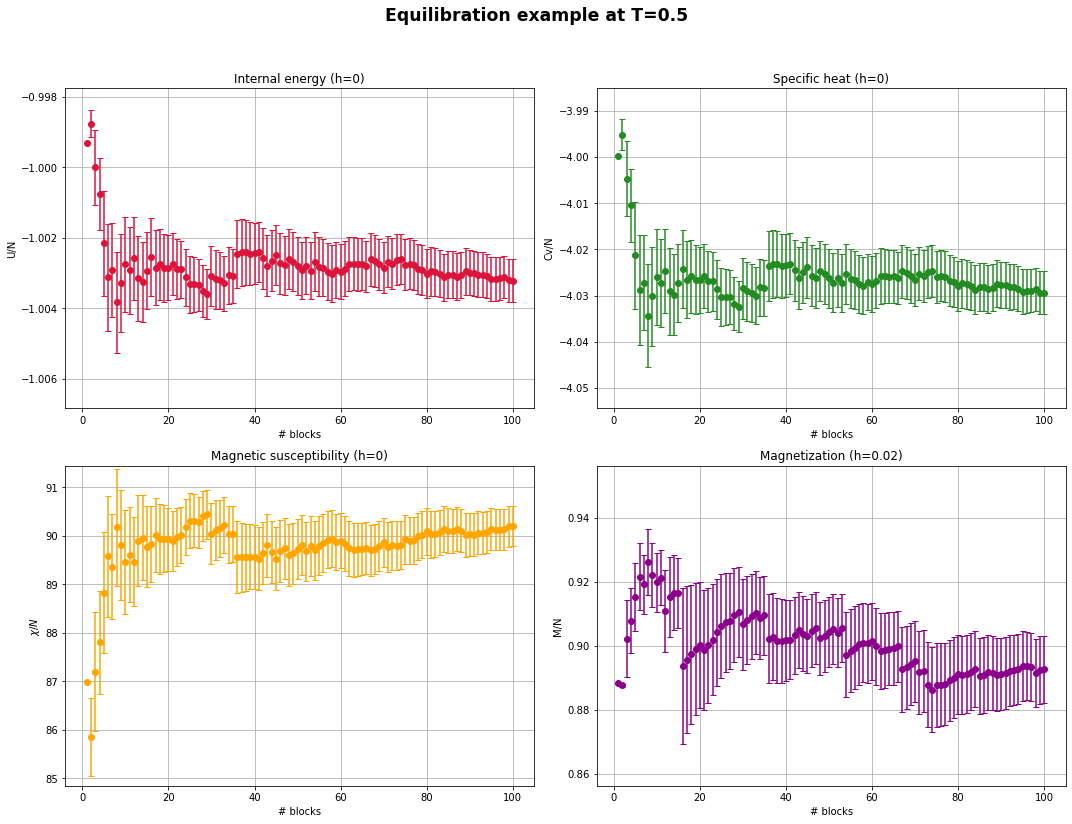

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Lettura dei dati dai file di output
xe, ye, erre = np.loadtxt('../OUTPUT/total_energy.dat', usecols=(0, 2, 3), unpack=True)
xc, yc, errc = np.loadtxt('../OUTPUT/specific_heat.dat', usecols=(0, 2, 3), unpack=True)
xx, yx, errx = np.loadtxt('../OUTPUT/susceptibility.dat', usecols=(0, 2, 3), unpack=True)
xm, ym, errm = np.loadtxt('../OUTPUT/magnetization.dat', usecols=(0, 2, 3), unpack=True)

# Creazione dei grafici
fig = plt.figure(figsize=(15, 12))
plt.suptitle("Equilibration example at T=0.5", size='xx-large', weight='bold')

# Energia interna
plt.subplot(221)
plt.errorbar(xe, ye, yerr=erre, color='crimson', fmt='o', capsize=3)
plt.title('Internal energy (h=0)')
plt.ylabel('U/N')
plt.xlabel('# blocks')
plt.ylim(min(ye) - 0.003, max(ye) + 0.001)
plt.grid(True)

# Calore specifico
plt.subplot(222)
plt.errorbar(xc, yc, yerr=errc, color='forestgreen', fmt='o', capsize=3)
plt.title('Specific heat (h=0)')
plt.ylabel('Cv/N')
plt.xlabel('# blocks')
plt.ylim(min(yc) - 0.02, max(yc) + 0.01)
plt.grid(True)

# Suscettibilità magnetica
plt.subplot(223)
plt.errorbar(xx, yx, yerr=errx, color='orange', fmt='o', capsize=3)
plt.title('Magnetic susceptibility (h=0)')
plt.ylabel('$\chi/N$')
plt.xlabel('# blocks')
plt.ylim(min(yx) - 1, max(yx) + 1)
plt.grid(True)

# Magnetizzazione
plt.subplot(224)
plt.errorbar(xm, ym, yerr=errm, color='darkmagenta', fmt='o', capsize=3)
plt.title('Magnetization (h=0.02)')
plt.ylabel('M/N')
plt.xlabel('# blocks')
plt.ylim(min(ym) - 0.03, max(ym) + 0.03)
plt.grid(True)

# Mostra il grafico
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Spazio per il titolo
plt.show()


#### Code for analytical solutions

In [42]:
#code for analytical solutions
def Umodel(T,J,N):
    beta = 1/T
    frac = (1+np.tanh(beta*J)**(N-2))/(1+np.tanh(beta*J)**N)
    return -J*np.tanh(beta*J)*frac

def ChiModel(T,J,N):
    beta = 1/T
    tanhN = np.tanh(beta*J)**N
    return beta*np.exp(2*beta*J)*(1-tanhN)/(1+tanhN)

def HeatModel(T,J,N):
    beta = 1/T
    th = np.tanh(J/T)
    thN= th**N
    ch = 1/th
    heat=((beta*J)**2)*(((1+thN+(N-1)*(th**2)+(N-1)*(ch**2)*thN)/(1+thN))-N*((th+ch*thN)/(1+thN))**2)
    return heat

def MagModel(T,J,N,h):
    b=1./T
    l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    Z = l1**N + l2**N
    M = (np.exp(b*J)*np.sinh(b*h)*((l1**(N-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(N-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
    return(M)

x  = np.linspace(0.4,2.1)
yU = Umodel(x,1.,50.)
yX = ChiModel(x,1.,50.)
yH = HeatModel(x,1.,50.)
yM = MagModel(x,1.,50.,0.02)
zero = np.zeros(x.size)

### Python Scripts to execute the simulation updating the input file

In [ ]:
#codice per stampare U, C, CHI, M con Metropolis 

import os
import subprocess
import shutil
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

#esegui file
def esegui_file_exe(percorso_exe):
    if not os.path.exists(percorso_exe):
        print("Il percorso specificato non esiste")
        return
    if not percorso_exe.endswith(".exe"):
        print("Il percorso specificato non punta a un file .exe")
        return
    try: 
        subprocess.run(percorso_exe)
    except Exception as e:
        print("Si è verificato un errore durante l'esecuzione del file .exe", str(e))

#modifica input
def modifica_parametro(file_path, parametro, nuovo_valore):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    for i, line in enumerate(lines):
        if parametro in line: 
            lines[i] = line.split()[0] + " " + str(nuovo_valore) + "\n"
            break
    with open(file_path, 'w') as file:
        file.writelines(lines)

outlines = []
for T100 in range(50, 201):
    T = T100/100
    modifica_parametro("../INPUT/input.dat", "TEMP", T)
    outlines.append(str(T) + "\t")

    esegui_file_exe("./simulator.exe")
    with open("../OUTPUT/total_energy.dat", 'r') as file:
        lines = file.readlines()
        outlines.append(lines[-2].split()[2] + "\t" + lines[-2].split()[3] + "\t")

    with open("../OUTPUT/specific_heat.dat", 'r') as file:
        lines = file.readlines()
        outlines.append(lines[-2].split()[2] + "\t" + lines[-2].split()[3] + "\t")

    with open("../OUTPUT/susceptibility.dat", 'r') as file:
        lines = file.readlines()
        outlines.append(lines[-2].split()[2] + "\t" + lines[-2].split()[3] + "\n" )

with open("metropolis_00.dat", "w") as file:
    file.writelines(outlines)

outlines_m = []
for T_m100 in range(50, 201):
    T_m = T_m100/100
    modifica_parametro("../INPUT/input.dat", "TEMP", T_m)
    outlines_m.append(str(T_m) + "\t")
    modifica_parametro("../INPUT/input.dat", "_H", 0.02)

    esegui_file_exe("./simulator.exe")

    with open("../OUTPUT/magnetization.dat", 'r') as file:
        lines = file.readlines()
        outlines_m.append(lines[-2].split()[2] + "\t" + lines[-2].split()[3] + "\n")

with open("metropolis_02.dat", "w") as file:
    file.writelines(outlines_m)

In [ ]:
#codice per stampare U, C, CHI, M con Gibbs

#esegui file
def esegui_file_exe(percorso_exe):
    if not os.path.exists(percorso_exe):
        print("Il percorso specificato non esiste")
        return
    if not percorso_exe.endswith(".exe"):
        print("Il percorso specificato non punta a un file .exe")
        return
    try: 
        subprocess.run(percorso_exe)
    except Exception as e:
        print("Si è verificato un errore durante l'esecuzione del file .exe", str(e))

#modifica input
def modifica_parametro(file_path, parametro, nuovo_valore):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    for i, line in enumerate(lines):
        if parametro in line: 
            lines[i] = line.split()[0] + " " + str(nuovo_valore) + "\n"
            break
    with open(file_path, 'w') as file:
        file.writelines(lines)

outlines = []
for T100 in range(50, 201):
    T = T100/100
    modifica_parametro("../INPUT/input.dat", "SIMULATION_TYPE", 3)
    modifica_parametro("../INPUT/input.dat", "TEMP", T)
    outlines.append(str(T) + "\t")

    esegui_file_exe("./simulator.exe")
    with open("../OUTPUT/total_energy.dat", 'r') as file:
        lines = file.readlines()
        outlines.append(lines[-2].split()[2] + "\t" + lines[-2].split()[3] + "\t")

    with open("../OUTPUT/specific_heat.dat", 'r') as file:
        lines = file.readlines()
        outlines.append(lines[-2].split()[2] + "\t" + lines[-2].split()[3] + "\t")

    with open("../OUTPUT/susceptibility.dat", 'r') as file:
        lines = file.readlines()
        outlines.append(lines[-2].split()[2] + "\t" + lines[-2].split()[3] + "\n" )

with open("Gibbs_00.dat", "w") as file:
    file.writelines(outlines)


outlines_m = []
for T_m100 in range(50, 201):
    T_m = T_m100/100
    modifica_parametro("../INPUT/input.dat", "SIMULATION_TYPE", 3)
    modifica_parametro("../INPUT/input.dat", "TEMP", T_m)
    outlines_m.append(str(T_m) + "\t")
    modifica_parametro("../INPUT/input.dat", "_H", 0.02)

    esegui_file_exe("./simulator.exe")

    with open("../OUTPUT/magnetization.dat", 'r') as file:
        lines = file.readlines()
        outlines_m.append(lines[-2].split()[2] + "\t" + lines[-2].split()[3] + "\n")

with open("Gibbs_02.dat", "w") as file:
    file.writelines(outlines_m)

#### Internal energy 

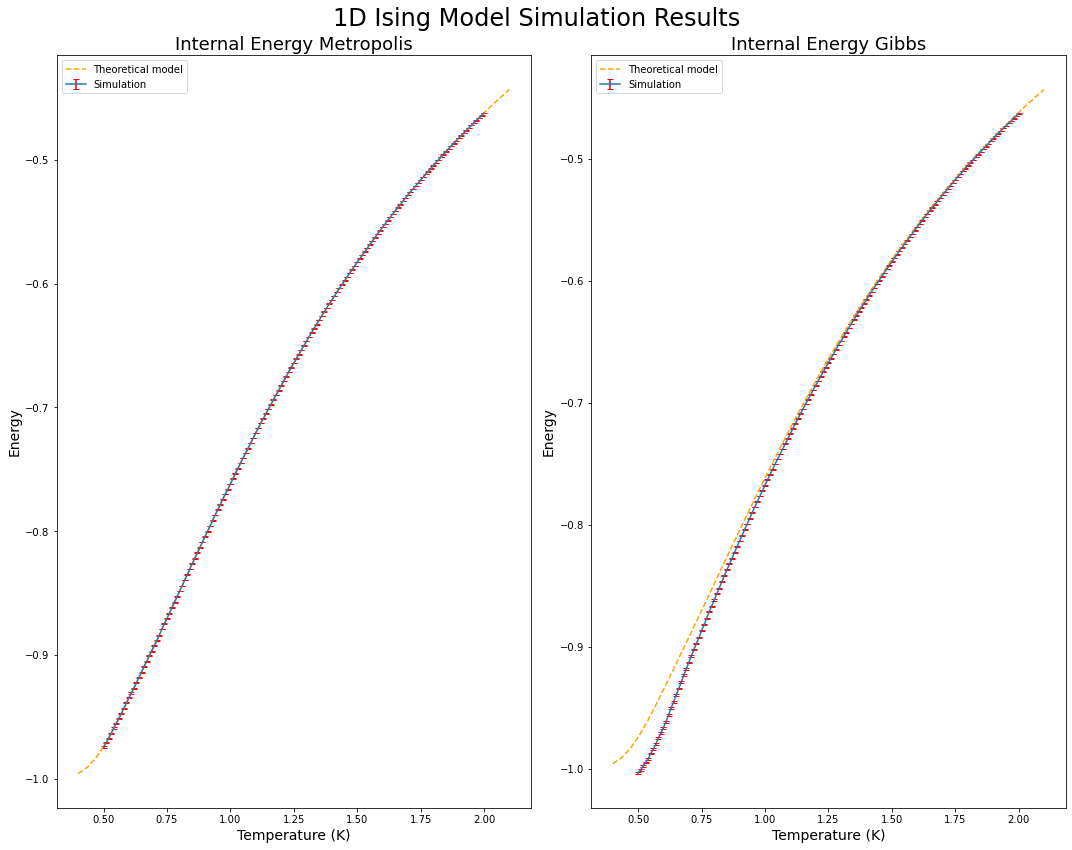

In [43]:
# Load data
T, Em, err_Em = np.loadtxt("metropolis_00.dat", usecols=(0,1,2), unpack=True)
T, Eg, err_Eg= np.loadtxt("Gibbs_00.dat", usecols=(0,1,2), unpack=True)

fig, axs = plt.subplots(1, 2, figsize=(15, 12))
fig.suptitle("1D Ising Model Simulation Results", fontsize=24)

# Internal Energy Metropolis
axs[0].errorbar(T, Em, yerr=err_Em, capsize=3, ecolor='red', markeredgecolor='black', label='Simulation')
axs[0].plot(x, yU, '--', label='Theoretical model', color='orange')
axs[0].set_title("Internal Energy Metropolis", fontsize=18)
axs[0].set_xlabel("Temperature (K)", fontsize=14)
axs[0].set_ylabel("Energy", fontsize=14)
axs[0].legend()


# Internal Energy Gibbs
axs[1].errorbar(T, Eg, yerr=err_Eg, capsize=3, ecolor='red', markeredgecolor='black', label='Simulation')
axs[1].plot(x, yU, '--', label='Theoretical model', color='orange')
axs[1].set_title("Internal Energy Gibbs", fontsize=18)
axs[1].set_xlabel("Temperature (K)", fontsize=14)
axs[1].set_ylabel("Energy", fontsize=14)
axs[1].legend()

plt.tight_layout()
plt.show()


#### Specific heat

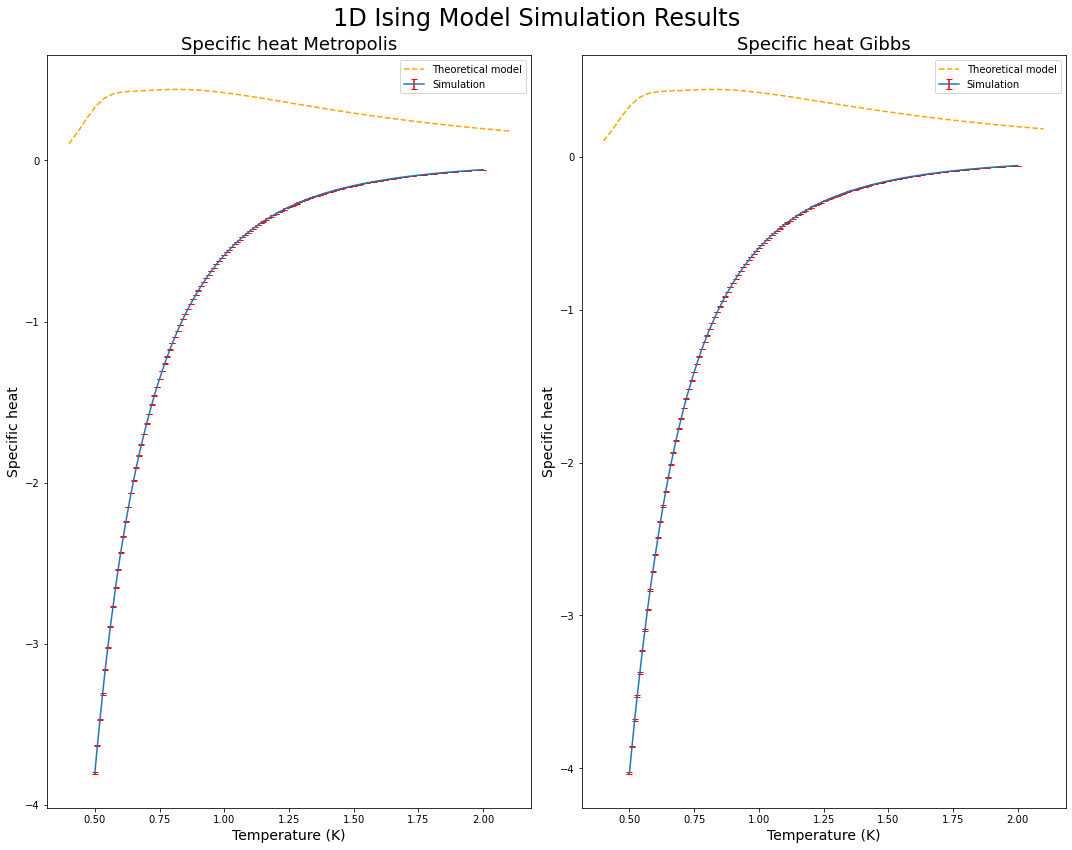

In [44]:
# Load data
T, Hm, err_Hm = np.loadtxt("metropolis_00.dat", usecols=(0,3,4), unpack=True)
T, Hg, err_Hg = np.loadtxt("Gibbs_00.dat", usecols=(0,3,4), unpack=True)

fig, axs = plt.subplots(1, 2, figsize=(15, 12))
fig.suptitle("1D Ising Model Simulation Results", fontsize=24)

# Internal Energy Metropolis
axs[0].errorbar(T, Hm, yerr=err_Hm, capsize=3, ecolor='red', markeredgecolor='black', label='Simulation')
axs[0].plot(x, yH, '--', label='Theoretical model', color='orange')
axs[0].set_title("Specific heat Metropolis", fontsize=18)
axs[0].set_xlabel("Temperature (K)", fontsize=14)
axs[0].set_ylabel("Specific heat", fontsize=14)
axs[0].legend()


# Internal Energy Gibbs
axs[1].errorbar(T, Hg, yerr=err_Hg, capsize=3, ecolor='red', markeredgecolor='black', label='Simulation')
axs[1].plot(x, yH, '--', label='Theoretical model', color='orange')
axs[1].set_title("Specific heat Gibbs", fontsize=18)
axs[1].set_xlabel("Temperature (K)", fontsize=14)
axs[1].set_ylabel("Specific heat", fontsize=14)
axs[1].legend()

plt.tight_layout()
plt.show()


#### Magnetization

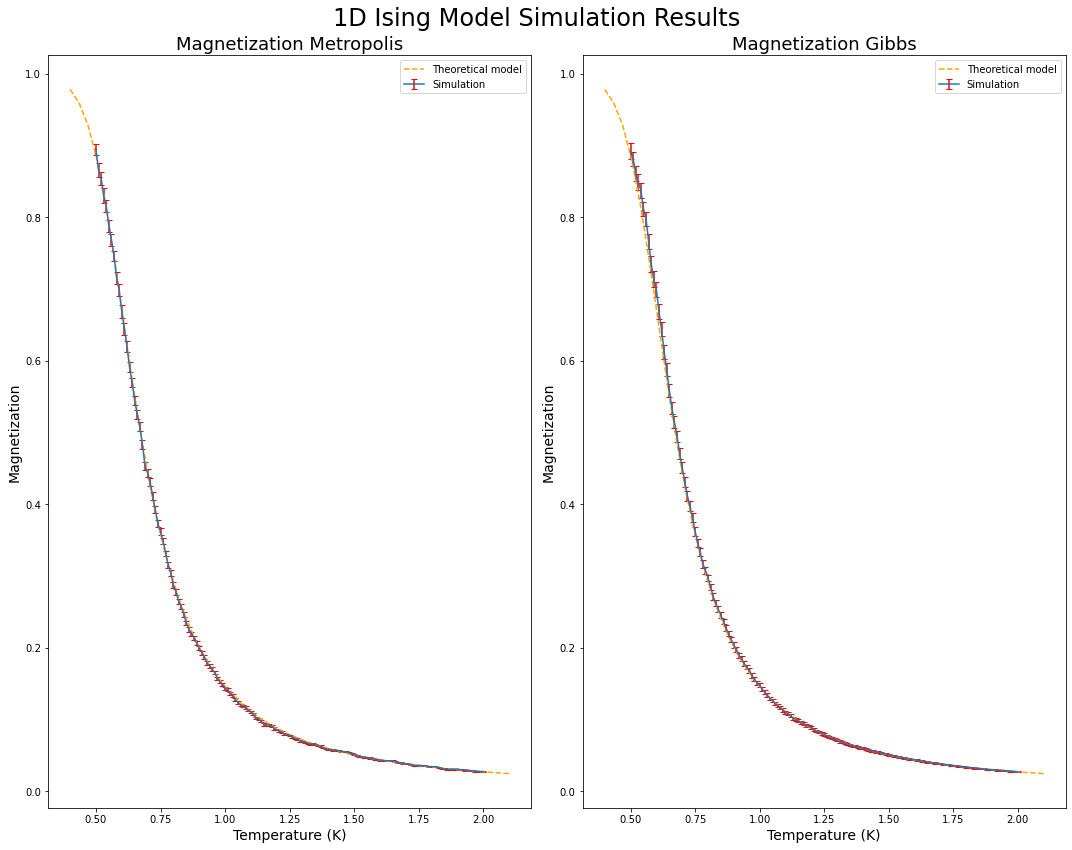

In [45]:
# Load data
T, Mm, err_Mm = np.loadtxt("metropolis_02.dat", usecols=(0,1,2), unpack=True)
T, Mg, err_Mg = np.loadtxt("Gibbs_02.dat", usecols=(0,1,2), unpack=True)

fig, axs = plt.subplots(1, 2, figsize=(15, 12))
fig.suptitle("1D Ising Model Simulation Results", fontsize=24)

# Internal Energy Metropolis
axs[0].errorbar(T, Mm, yerr=err_Mm, capsize=3, ecolor='red', markeredgecolor='black', label='Simulation')
axs[0].plot(x, yM, '--', label='Theoretical model', color='orange')
axs[0].set_title("Magnetization Metropolis", fontsize=18)
axs[0].set_xlabel("Temperature (K)", fontsize=14)
axs[0].set_ylabel("Magnetization", fontsize=14)
axs[0].legend()


# Internal Energy Gibbs
axs[1].errorbar(T, Mg, yerr=err_Mg, capsize=3, ecolor='red', markeredgecolor='black', label='Simulation')
axs[1].plot(x, yM, '--', label='Theoretical model', color='orange')
axs[1].set_title("Magnetization Gibbs", fontsize=18)
axs[1].set_xlabel("Temperature (K)", fontsize=14)
axs[1].set_ylabel("Magnetization", fontsize=14)
axs[1].legend()

plt.tight_layout()
plt.show()


#### Susceptibility

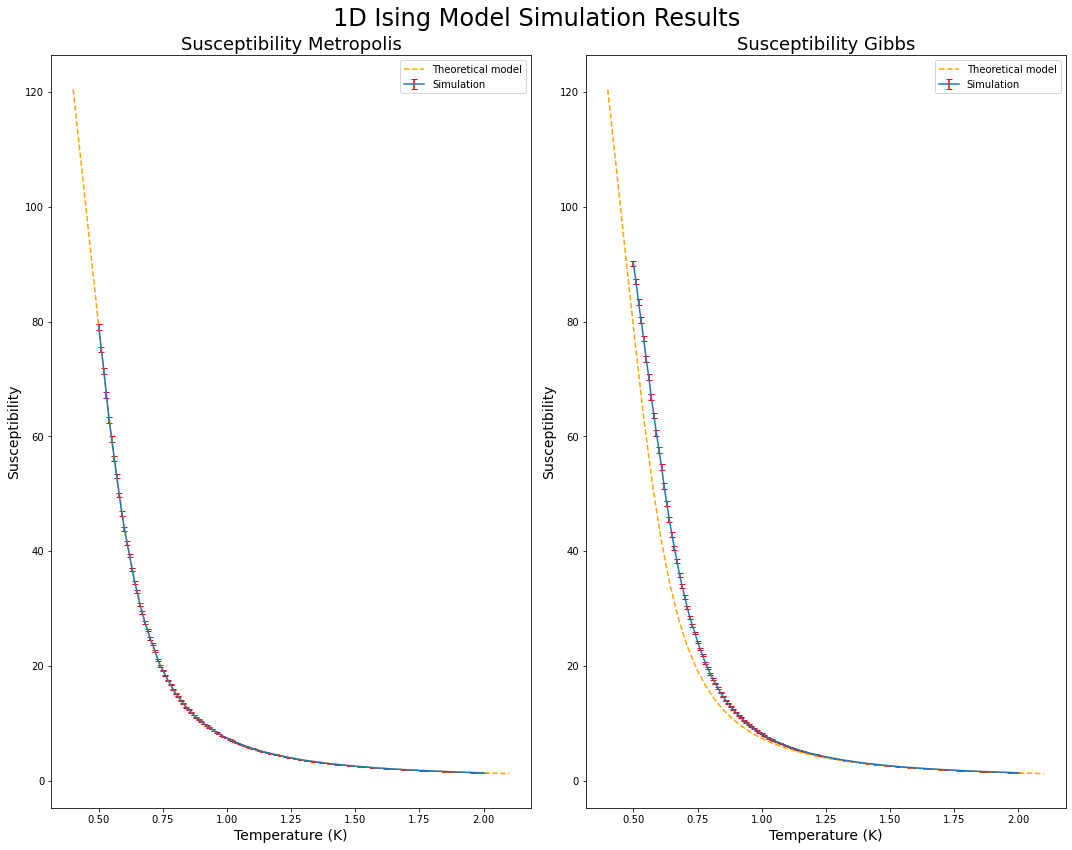

In [46]:
# Load data
T, chim, err_chim = np.loadtxt("metropolis_00.dat", usecols=(0,5,6), unpack=True)
T, chig, err_chig = np.loadtxt("Gibbs_00.dat", usecols=(0,5,6), unpack=True)

fig, axs = plt.subplots(1, 2, figsize=(15, 12))
fig.suptitle("1D Ising Model Simulation Results", fontsize=24)

# Susceptibility Metropolis
axs[0].errorbar(T, chim, yerr=err_chim, capsize=3, ecolor='red', markeredgecolor='black', label='Simulation')
axs[0].plot(x, yX, '--', label='Theoretical model', color='orange')
axs[0].set_title("Susceptibility Metropolis", fontsize=18)
axs[0].set_xlabel("Temperature (K)", fontsize=14)
axs[0].set_ylabel("Susceptibility", fontsize=14)
axs[0].legend()


# Susceptibility Gibbs
axs[1].errorbar(T, chig, yerr=err_chig, capsize=3, ecolor='red', markeredgecolor='black', label='Simulation')
axs[1].plot(x, yX, '--', label='Theoretical model', color='orange')
axs[1].set_title("Susceptibility Gibbs", fontsize=18)
axs[1].set_xlabel("Temperature (K)", fontsize=14)
axs[1].set_ylabel("Susceptibility", fontsize=14)
axs[1].legend()

plt.tight_layout()
plt.show()
